In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

1. Suppose the globe tossing data (Lecture 2, Chapter 2) had turned out to
be 4 water and 11 land. Construct the posterior distribution.

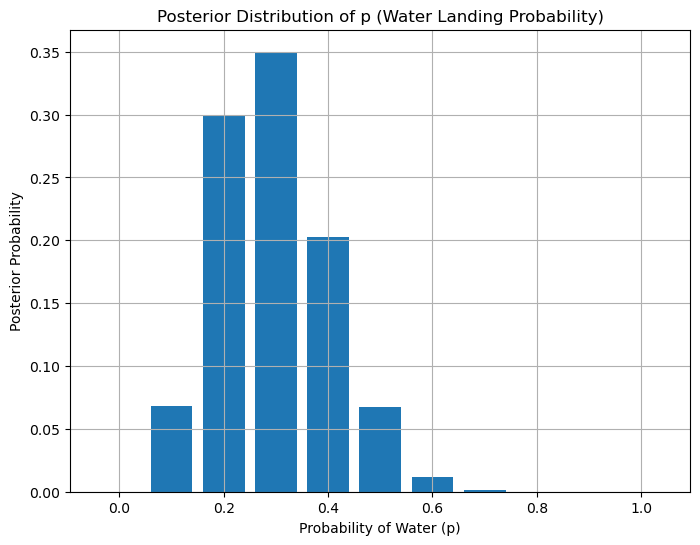

,poss,ways,post
0,0.0,0.000000e+00,0.000
1,0.1,3.138106e-05,0.068
2,0.2,1.374390e-04,0.300
3,0.3,1.601635e-04,0.350
4,0.4,9.287605e-05,0.203
5,0.5,3.051758e-05,0.067
6,0.6,5.435818e-06,0.012
7,0.7,4.253299e-07,0.001
8,0.8,8.388608e-09,0.000
9,0.9,6.561000e-12,0.000


In [2]:
def compute_posterior(W, L, poss=None):
    if poss is None:
        poss = np.linspace(0, 1, 11)  # Default to 11 points from 0 to 1
    ways = np.array([q**W * (1-q)**L for q in poss])
    post = ways / ways.sum()
    return pd.DataFrame({'poss': poss, 'ways': ways, 'post': np.round(post, 3)})

# Example usage:
W = 4
L = 11
posterior_distribution = compute_posterior(W, L)

# Plotting the posterior distribution
plt.figure(figsize=(8, 6))
plt.bar(posterior_distribution['poss'], posterior_distribution['post'], width=0.08)
plt.xlabel('Probability of Water (p)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution of p (Water Landing Probability)')
plt.grid(True)
plt.show()
posterior_distribution

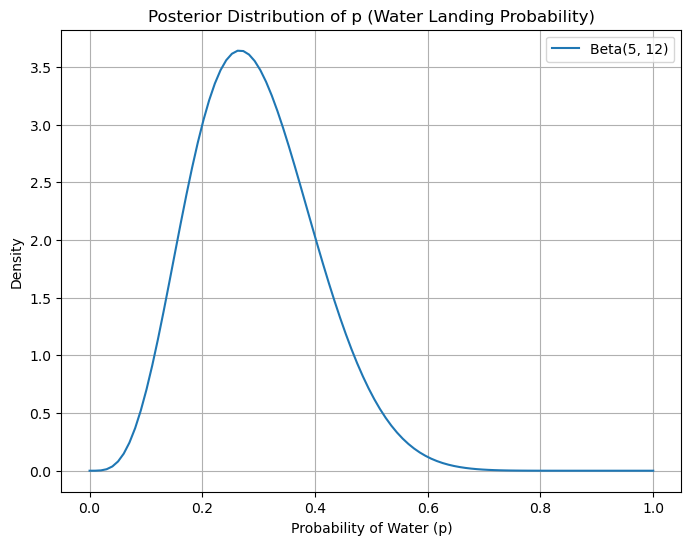

In [11]:
# Define the posterior parameters
alpha, beta_params = 5, 12  # Renamed the 'beta' parameter to 'beta_params'

# Create a range of possible p values from 0 to 1
p_values = np.linspace(0, 1, 100)

# Calculate the density of the Beta distribution at each p value
density = beta.pdf(p_values, alpha, beta_params)  # Using 'beta_dist' instead of 'beta'

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(p_values, density, label=f'Beta({alpha}, {beta_params})')
plt.xlabel('Probability of Water (p)')
plt.ylabel('Density')
plt.title('Posterior Distribution of p (Water Landing Probability)')
plt.legend()
plt.grid(True)
plt.show()

2. Using the posterior distribution from 1, compute the posterior predictive
distribution for the next 5 tosses of the same globe. I recommend you use
the sampling method.

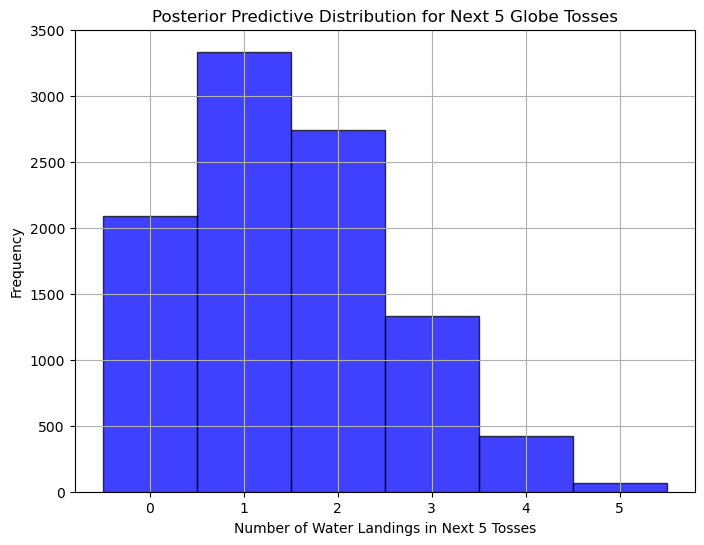

In [14]:
# Step 1: Sample from the Beta distribution (posterior)
p_samples = beta.rvs(5, 12, size=10000)

# Step 2: Simulate the next 5 tosses for each sampled p
W_sim = binom.rvs(n=5, p=p_samples, size=10000)

# Step 3: Visualize the results
plt.figure(figsize=(8, 6))
plt.hist(W_sim, bins=np.arange(-0.5, 6, 1), alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Number of Water Landings in Next 5 Tosses')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution for Next 5 Globe Tosses')
plt.xticks(range(6))  # Set x-ticks to be whole numbers
plt.grid(True)
plt.show()

3. Use the posterior predictive distribution from 2 to calculate the probability of 3 or more water samples in the next 5 tosses.

In [16]:
# Calculate the number of outcomes with 3 or more water landings
success_count = np.sum(W_sim >= 3)

# Calculate the probability
probability = success_count / len(W_sim)

# Print the probability
print("Probability of 3 or more water landings in the next 5 tosses:", probability)

Probability of 3 or more water landings in the next 5 tosses: 0.1826


4-OPTIONAL. This problem is an optional challenge for people who are
taking the course for a second or third time. Suppose you observe W = 5
water points, but you forgot to write down how many times the globe was
tossed, so you don’t know the number of land points L. Assume that p = 0.7
and compute the posterior distribution of the number of tosses N. Hint: Use
the binomial distribution

In [18]:
def compute_posterior_N(W, p, N_max):
    # Create an array of possible N values from W to N_max
    N_range = np.arange(W, N_max + 1)
    # Compute the likelihood for each N
    likelihood = binom.pmf(W, N_range, p)
    # Normalize to get posterior probabilities
    posterior = likelihood / likelihood.sum()
    # Create a DataFrame for easier viewing and analysis
    return pd.DataFrame({'N': N_range, 'ways': likelihood, 'post': np.round(posterior, 3)})

# Example usage
W = 5
p = 0.7
N_max = 20
posterior_df = compute_posterior_N(W, p, N_max)
print(posterior_df)

     N      ways   post
0    5  0.168070  0.118
1    6  0.302526  0.212
2    7  0.317652  0.222
3    8  0.254122  0.178
4    9  0.171532  0.120
5   10  0.102919  0.072
6   11  0.056606  0.040
7   12  0.029111  0.020
8   13  0.014192  0.010
9   14  0.006623  0.005
10  15  0.002980  0.002
11  16  0.001300  0.001
12  17  0.000553  0.000
13  18  0.000230  0.000
14  19  0.000093  0.000
15  20  0.000037  0.000


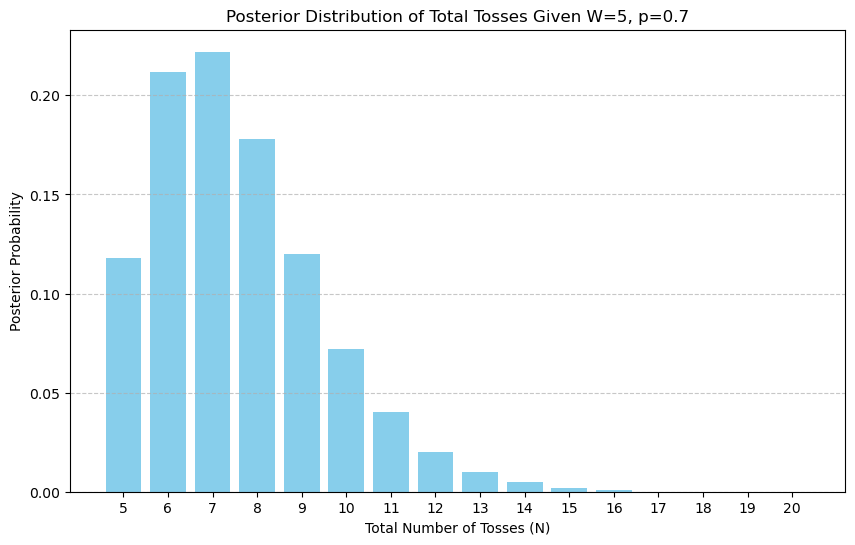

In [19]:
# Plotting the posterior distribution
plt.figure(figsize=(10, 6))
plt.bar(posterior_df['N'], posterior_df['post'], color='skyblue')
plt.xlabel('Total Number of Tosses (N)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution of Total Tosses Given W=5, p=0.7')
plt.xticks(np.arange(W, N_max + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()